# DEBE INSTALAR EN ANACONDA LAS SIGUIENTES LIBRERIAS:
graphviz, python-graphviz, ipython, ipywidgets, python-pydot, python-pydot-ng

In [47]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import export_graphviz
import seaborn as sb
from sklearn.metrics import accuracy_score
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
import ipywidgets as widgets
from IPython.display import display
from IPython.display import SVG

In [48]:
# load dataset
data = pd.read_csv("iris.csv")

In [49]:
data.shape

(150, 5)

In [50]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


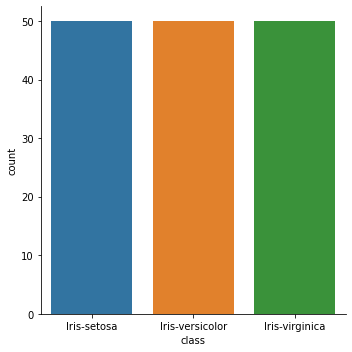

In [52]:
sb.catplot('class',data=data,kind="count")

## Feature Selection:

In [53]:
#split features and class variable
feature_cols = ['sepal_length','sepal_width','petal_length', 'petal_width']
X = data[feature_cols] # Features
y = data['class'] # Target variable

## Splitting Data

In [54]:
# Split dataset into training set and test set (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Create the classifier (Decision Tree)

In [55]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

## Classify with the DT

In [56]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

## The accuracy of the model

In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


## Confusion Matrix

[Confusion Matrix Explanation:](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. 
The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 
The higher the diagonal values of the confusion matrix the better, indicating many correct predictions

In [58]:
#Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label 
#being i-th class and prediced label being j-th class.
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


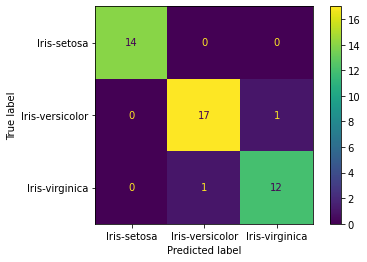

In [59]:
#Plot Confusion Matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

## Visualize the DT

In [46]:
# exportar el modelo a archivo .dot
with open(r"dt_tree.dot", 'w') as f:
     f = export_graphviz(clf, out_file=f, impurity = True,
                              class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica'],  feature_names = feature_cols,rounded = True, filled= True )
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'dt_tree.dot','-o',r'dt_tree.png'])
PImage("dt_tree.png")

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

## Create an Interactive Decision Tree

In [ ]:
def one_DT(critVal, splitVal, mx_depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0, criterion = critVal, splitter = splitVal, max_depth = mx_depth, min_samples_split=min_split, min_samples_leaf=min_leaf)
    
    estimator.fit(X, y)
    graph = graphviz.Source(export_graphviz(estimator, out_file=None, feature_names=feature_cols, class_names= ['Iris-setosa','Iris-versicolor','Iris-virginica'], filled = True))

    display(SVG(graph.pipe(format='svg')))
    return estimator

In [ ]:
interObject=interactive(one_DT 
   , critVal = ["gini", "entropy"]
   , splitVal = ["best", "random"]
   , mx_depth= list(range(1,20,2))
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(interObject)